In [ ]:
import numpy as np
import pandas as pd
from warnings import filterwarnings
filterwarnings('ignore')
!pip install tensorflow==1.15.0
!pip install keras==2.2.4

     |████████████████████████████████| 412.3 MB 24 kB/s 
     |████████████████████████████████| 503 kB 59.7 MB/s 
     |████████████████████████████████| 3.8 MB 21.2 MB/s 
     |████████████████████████████████| 50 kB 7.0 MB/s 
  Created wheel for gast: filename=gast-0.2.2-py3-none-any.whl size=7554 sha256=be61f5bc1bee5af79e6abcce5dac762984076fa68316a53931644aab6d9745da
  Stored in directory: /root/.cache/pip/wheels/21/7f/02/420f32a803f7d0967b48dd823da3f558c5166991bfd204eef3
Successfully built gast
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
  Attempting uninstall: gast
    Found existing installation: gast 0.4.0
    Uninstalling gast-0.4.0:
      Succes

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
data = pd.read_csv("/content/drive/My Drive/NLP Project/Reviews.csv", nrows=50000)

In [ ]:
data.head()

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...


In [ ]:
data.shape

(50000, 10)

In [ ]:
data.columns

Index(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator',
       'HelpfulnessDenominator', 'Score', 'Time', 'Summary', 'Text'],
      dtype='object')

In [ ]:
data.isnull().sum()

Id                        0
ProductId                 0
UserId                    0
ProfileName               3
HelpfulnessNumerator      0
HelpfulnessDenominator    0
Score                     0
Time                      0
Summary                   2
Text                      0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Id                      50000 non-null  int64 
 1   ProductId               50000 non-null  object
 2   UserId                  50000 non-null  object
 3   ProfileName             49997 non-null  object
 4   HelpfulnessNumerator    50000 non-null  int64 
 5   HelpfulnessDenominator  50000 non-null  int64 
 6   Score                   50000 non-null  int64 
 7   Time                    50000 non-null  int64 
 8   Summary                 49998 non-null  object
 9   Text                    50000 non-null  object
dtypes: int64(5), object(5)
memory usage: 3.8+ MB


In [ ]:
df = data.drop(['Id', 'ProductId', 'UserId', 'ProfileName', 'HelpfulnessNumerator', 'HelpfulnessDenominator', 'Score', 'Time'], axis = 1)
df.rename(columns={'Text': 'Review'}, inplace = True)

In [ ]:
column_titles = ["Review", "Summary"]
df = df.reindex(columns = column_titles)

In [ ]:
df.drop_duplicates(subset = ['Review'], inplace = True) 
df.dropna(axis = 0, inplace = True) 

In [ ]:
df.head()

,Review,Summary
0,I have bought several of the Vitality canned d...,Good Quality Dog Food
1,Product arrived labeled as Jumbo Salted Peanut...,Not as Advertised
2,This is a confection that has been around a fe...,"""Delight"" says it all"
3,If you are looking for the secret ingredient i...,Cough Medicine
4,Great taffy at a great price. There was a wid...,Great taffy


In [ ]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')
stop_words = stopwords.words('english') 

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
contraction_map = {
 "ain't": "is not", 
 "aren't": "are not",
 "can't": "cannot", 
 "'cause": "because",
 "could've": "could have",
 "couldn't": "could not",
 "didn't": "did not",  
 "doesn't": "does not", 
 "don't": "do not", 
 "hadn't": "had not", 
 "hasn't": "has not", 
 "haven't": "have not",
 "he'd": "he would",
 "he'll": "he will", 
 "he's": "he is", 
 "how'd": "how did", 
 "how'd'y": "how do you",
 "how'll": "how will", 
 "how's": "how is",                         
 "I'd": "I would", 
 "I'd've": "I would have", 
 "I'll": "I will", 
 "I'll've": "I will have",
 "I'm": "I am", 
 "I've": "I have", 
 "i'd": "i would",
 "i'd've": "i would have", 
 "i'll": "i will", 
 "i'll've": "i will have",
 "i'm": "i am", 
 "i've": "i have", 
 "isn't": "is not", 
 "it'd": "it would",
 "it'd've": "it would have", 
 "it'll": "it will", 
 "it'll've": "it will have",
 "it's": "it is", 
 "let's": "let us", 
 "ma'am": "madam",
 "mayn't": "may not", 
 "might've": "might have",
 "mightn't": "might not",
 "mightn't've": "might not have", 
 "must've": "must have",
 "mustn't": "must not", 
 "mustn't've": "must not have", 
 "needn't": "need not", 
 "needn't've": "need not have",
 "o'clock": "of the clock",
 "oughtn't": "ought not", 
 "oughtn't've": "ought not have", 
 "shan't": "shall not", 
 "sha'n't": "shall not", 
 "shan't've": "shall not have",
 "she'd": "she would", 
 "she'd've": "she would have", 
 "she'll": "she will", 
 "she'll've": "she will have", 
 "she's": "she is",
 "should've": "should have", 
 "shouldn't": "should not", 
 "shouldn't've": "should not have", 
 "so've": "so have",
 "so's": "so as",
 "this's": "this is",
 "that'd": "that would", 
 "that'd've": "that would have", 
 "that's": "that is", 
 "there'd": "there would",
 "there'd've": "there would have", 
 "there's": "there is", 
 "here's": "here is",
 "they'd": "they would", 
 "they'd've": "they would have",
 "they'll": "they will", 
 "they'll've": "they will have", 
 "they're": "they are", 
 "they've": "they have", 
 "to've": "to have",
 "wasn't": "was not", 
 "we'd": "we would", 
 "we'd've": "we would have", 
 "we'll": "we will", 
 "we'll've": "we will have", 
 "we're": "we are", 
 "we've": "we have", 
 "weren't": "were not", 
 "what'll": "what will", 
 "what'll've": "what will have", 
 "what're": "what are",
 "what's": "what is", 
 "what've": "what have", 
 "when's": "when is",
 "when've": "when have", 
 "where'd": "where did", 
 "where's": "where is",
 "where've": "where have", 
 "who'll": "who will", 
 "who'll've": "who will have", 
 "who's": "who is", 
 "who've": "who have",
 "why's": "why is", 
 "why've": "why have", 
 "will've": "will have", 
 "won't": "will not", 
 "won't've": "will not have",
 "would've": "would have", 
 "wouldn't": "would not", 
 "wouldn't've": "would not have", 
 "y'all": "you all",
 "y'all'd": "you all would",
 "y'all'd've": "you all would have",
 "y'all're": "you all are",
 "y'all've": "you all have",
 "you'd": "you would", 
 "you'd've": "you would have", 
 "you'll": "you will", 
 "you'll've": "you will have",
 "you're": "you are", 
 "you've": "you have" }

In [ ]:
import re
from bs4 import BeautifulSoup

def make_lowercase(text):
  return text.lower()

def remove_HTML(text):
  return BeautifulSoup(text, 'lxml').text

def map_contractions(text):
  return ' '.join([contraction_map[word] if word in contraction_map else word for word in text.split(" ")])
  
def remove_extras(text):
  text = re.sub('"', '', text)
  text = re.sub(r"'s\b", "", text)
  text = re.sub(r'\([^)]*\)', '', text)
  text = re.sub("[^a-zA-Z]", " ", text) 
  text = re.sub('[m]{2,}', 'mm', text)
  return text

def remove_stopwords(text, type):
  if type == 0:
    tokens = [word for word in text.split() if not word in stop_words]
  else:
    tokens = text.split()
  return tokens

def remove_shortwords(tokens):
  long_words = []
  for token in tokens:
    if len(token) > 1:
      long_words.append(token)
  return (" ".join(long_words)).strip()

In [ ]:
processed_reviews = []
processed_summaries = []

for review, summary in zip(df['Review'], df['Summary']):
  review, summary = make_lowercase(review), make_lowercase(summary)
  review, summary = remove_HTML(review), remove_HTML(summary)
  review, summary = map_contractions(review), map_contractions(summary)
  review, summary = remove_extras(review), remove_extras(summary)
  review, summary = remove_stopwords(review, 0), remove_stopwords(summary, 1)
  review, summary = remove_shortwords(review), remove_shortwords(summary)
  processed_reviews.append(review)
  processed_summaries.append(summary)

In [ ]:
processed_reviews[:10]

['bought several vitality canned dog food products found good quality product looks like stew processed meat smells better labrador finicky appreciates product better',
 'product arrived labeled jumbo salted peanuts peanuts actually small sized unsalted sure error vendor intended represent product jumbo',
 'confection around centuries light pillowy citrus gelatin nuts case filberts cut tiny squares liberally coated powdered sugar tiny mouthful heaven chewy flavorful highly recommend yummy treat familiar story lewis lion witch wardrobe treat seduces edmund selling brother sisters witch',
 'looking secret ingredient robitussin believe found got addition root beer extract ordered made cherry soda flavor medicinal',
 'great taffy great price wide assortment yummy taffy delivery quick taffy lover deal',
 'got wild hair taffy ordered five pound bag taffy enjoyable many flavors watermelon root beer melon peppermint grape etc complaint bit much red black licorice flavored pieces kids husband l

In [ ]:
processed_summaries[:10]

['good quality dog food',
 'not as advertised',
 'delight says it all',
 'cough medicine',
 'great taffy',
 'nice taffy',
 'great just as good as the expensive brands',
 'wonderful tasty taffy',
 'yay barley',
 'healthy dog food']

In [ ]:
df['Review'] = processed_reviews
df['Summary'] = processed_summaries

In [ ]:
df.replace('', np.nan, inplace = True)
df.dropna(axis = 0, inplace = True)

In [ ]:
review_length = []
summary_length = []

for review, summary in zip(df['Review'], df['Summary']):
  review_length.append(len(review.split()))
  summary_length.append(len(summary.split()))

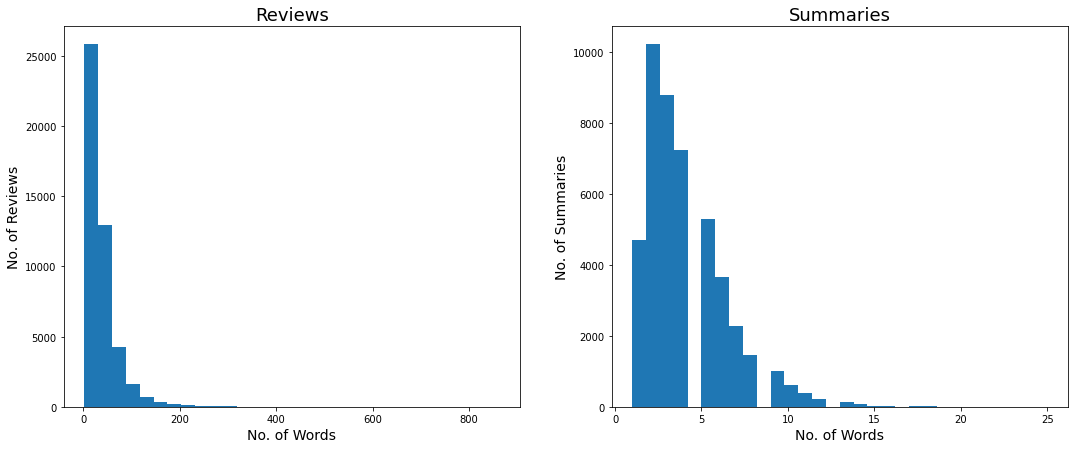

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (18, 7))
plt.subplot(1, 2, 1)
plt.title('Reviews', fontsize = 18)
plt.xlabel('No. of Words', fontsize = 14)
plt.ylabel('No. of Reviews', fontsize = 14)
plt.hist(review_length, bins = 30)

plt.subplot(1, 2, 2)
plt.title('Summaries', fontsize = 18)
plt.xlabel('No. of Words', fontsize = 14)
plt.ylabel('No. of Summaries', fontsize = 14)
plt.hist(summary_length, bins = 30)
plt.show()

In [ ]:
review_count = 0
summary_count = 0

for review, summary in zip(df['Review'], df['Summary']):
  if len(review.split()) <= 60:
    review_count = review_count + 1
  if len(summary.split()) <= 8:
    summary_count = summary_count + 1

print("% of reviews having less than 80 words: ", (review_count / len(df['Review'])) * 100)
print("% of summaries having less than 8 words: ", (summary_count / len(df['Summary'])) * 100)

% of reviews having less than 80 words:  84.4422806448123
% of summaries having less than 8 words:  94.38926755382452


In [ ]:
max_review_length = 60
max_summary_length = 8

In [ ]:
reviews = np.array(df['Review'])
summaries = np.array(df['Summary'])

short_reviews = []
short_summaries = []

for index in range(len(reviews)):
  if len(reviews[index].split()) <= max_review_length and len(summaries[index].split()) <= max_summary_length:
    short_reviews.append(reviews[index])
    short_summaries.append(summaries[index])

In [ ]:
df = pd.DataFrame({'Review': short_reviews, 'Summary': short_summaries})
df['Summary'] = df['Summary'].apply(lambda summary: 'sumstart ' + summary + ' sumend')

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.array(df['Review']), np.array(df['Summary']), test_size = 0.1, random_state = 10, shuffle = True)

In [ ]:
from keras_preprocessing.text import Tokenizer
from keras_preprocessing.sequence import pad_sequences

X_tokenizer = Tokenizer()
X_tokenizer.fit_on_texts(list(X_train))

In [ ]:
review_rare_threshold = 4

review_rare_words = 0
review_total_words = 0
review_rare_frequency = 0
review_total_frequency = 0

for frequency in X_tokenizer.word_counts.values():
  review_total_words = review_total_words + 1
  review_total_frequency = review_total_frequency + frequency
  if (frequency < review_rare_threshold):
    review_rare_words = review_rare_words + 1
    review_rare_frequency = review_rare_frequency + frequency

In [ ]:
print("% of rare words in vocabulary:", (review_rare_words/review_total_words) * 100)
print("Total coverage of rare words:", (review_rare_frequency/review_total_frequency) * 100)

% of rare words in vocabulary: 64.55237810796685
Total coverage of rare words: 2.7346294846039476


In [ ]:
review_common_words = review_total_words - review_rare_words

X_tokenizer = Tokenizer(num_words = review_common_words)
X_tokenizer.fit_on_texts(list(X_train))

X_train_sequence = X_tokenizer.texts_to_sequences(X_train)
X_test_sequence = X_tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train_sequence, maxlen = max_review_length, padding = 'post')
X_test = pad_sequences(X_test_sequence, maxlen = max_review_length, padding = 'post')

X_vocabulary_size = X_tokenizer.num_words + 1
print("Size of Review Vocabulary: ", X_vocabulary_size)

Size of Review Vocabulary:  9496


In [ ]:
y_tokenizer = Tokenizer()   
y_tokenizer.fit_on_texts(list(y_train))

In [ ]:
summary_rare_threshold = 6

summary_rare_words = 0
summary_total_words = 0
summary_rare_frequency = 0
summary_total_frequency = 0

for frequency in y_tokenizer.word_counts.values():
  summary_total_words = summary_total_words + 1
  summary_total_frequency = summary_total_frequency + frequency
  if (frequency < summary_rare_threshold):
    summary_rare_words = summary_rare_words + 1
    summary_rare_frequency = summary_rare_frequency + frequency

In [ ]:
print("% of rare words in vocabulary:", (summary_rare_words/summary_total_words) * 100)
print("Total coverage of rare words:", (summary_rare_frequency/summary_total_frequency) * 100)

% of rare words in vocabulary: 78.14729713387351
Total coverage of rare words: 5.973890111806115


In [ ]:
summary_common_words = summary_total_words - summary_rare_words

y_tokenizer = Tokenizer(num_words = summary_common_words)
y_tokenizer.fit_on_texts(list(y_train))

y_train_sequence = y_tokenizer.texts_to_sequences(y_train)
y_test_sequence = y_tokenizer.texts_to_sequences(y_test)

y_train = pad_sequences(y_train_sequence, maxlen = max_summary_length, padding = 'post')
y_test = pad_sequences(y_test_sequence, maxlen = max_summary_length, padding = 'post')

y_vocabulary_size = y_tokenizer.num_words + 1
print("Size of Summary Vocabulary: ", y_vocabulary_size)

Size of Summary Vocabulary:  1808


In [ ]:
empty = []
for summary in range(len(y_train)):
  token_count = 0
  for token in y_train[summary]:
    if token != 0:
      token_count = token_count + 1
  if token_count == 2:
    empty.append(summary)

In [ ]:
X_train = np.delete(X_train, empty, axis = 0)
print(X_train)

[[ 212   44 4517 ...    0    0    0]
 [1149 4711   11 ...    0    0    0]
 [   1 4047    9 ...    0    0    0]
 ...
 [  18 1597  636 ...    0    0    0]
 [1047  100    9 ...    0    0    0]
 [   1    8  131 ...    0    0    0]]


In [ ]:
y_train = np.delete(y_train, empty, axis = 0)
print(y_train)

[[  1  62   2 ...   0   0   0]
 [  1 503   9 ...   0   0   0]
 [  1   6  11 ...   0   0   0]
 ...
 [  1   3  16 ...  31   2   0]
 [  1  57 680 ...   0   0   0]
 [  1  10  15 ...   0   0   0]]


In [ ]:
empty = []
for summary in range(len(y_test)):
  token_count = 0
  for token in y_test[summary]:
    if token != 0:
      token_count = token_count + 1
  if token_count == 2:
    empty.append(summary)

In [ ]:
X_test = np.delete(X_test, empty, axis = 0)
print(X_test)

[[  44 1627 4759 ...    0    0    0]
 [   1    9    5 ...    0    0    0]
 [   3    5  927 ...    0    0    0]
 ...
 [  15   11   23 ...    0    0    0]
 [ 155 2405 1442 ...    0    0    0]
 [ 148   46  272 ...    0    0    0]]


In [ ]:
y_test = np.delete(y_test, empty, axis = 0)
print(y_test)

[[   1  146    6 ...    0    0    0]
 [ 149   48   76 ...   35  107    2]
 [   1 1108 1223 ...    0    0    0]
 ...
 [   1   22    4 ...    0    0    0]
 [   1   51   71 ...    0    0    0]
 [   1  254  228 ...   46  331    2]]


In [ ]:
from tensorflow.python.framework.ops import disable_eager_execution

disable_eager_execution()

In [ ]:
from tensorflow.keras.layers import Input, LSTM, Embedding, Dense, Concatenate, TimeDistributed
from tensorflow.keras.models import Model

In [ ]:
from attention import AttentionLayer
from keras import backend as K

Using TensorFlow backend.


In [ ]:
latent_dimension = 300
embedding_dimension = 100

encoder_inputs = Input(shape=(max_review_length,))
encoder_embed_layer =  Embedding(X_vocabulary_size, embedding_dimension, trainable=True)
encoder_embedding = encoder_embed_layer(encoder_inputs)

encoder_lstm1 = LSTM(latent_dimension, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output1, state_h1, state_c1 = encoder_lstm1(encoder_embedding)

encoder_lstm2 = LSTM(latent_dimension, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_output2, state_h2, state_c2 = encoder_lstm2(encoder_output1)

encoder_lstm3 = LSTM(latent_dimension, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.4)
encoder_outputs, state_h, state_c= encoder_lstm3(encoder_output2)

decoder_inputs = Input(shape=(None,))
decoder_embed_layer = Embedding(y_vocabulary_size, embedding_dimension, trainable=True)
decoder_embedding = decoder_embed_layer(decoder_inputs)

decoder_lstm = LSTM(latent_dimension, return_sequences=True, return_state=True, dropout=0.4, recurrent_dropout=0.2)
decoder_outputs, decoder_fwd_state, decoder_back_state = decoder_lstm(decoder_embedding, initial_state=[state_h, state_c])

attn_layer = AttentionLayer(name='attention_layer')
attn_out, attn_states = attn_layer([encoder_outputs, decoder_outputs])

decoder_concat_input = Concatenate(axis=-1, name='concat_layer')([decoder_outputs, attn_out])
decoder_dense =  TimeDistributed(Dense(y_vocabulary_size, activation='softmax'))
decoder_outputs = decoder_dense(decoder_concat_input)

model = Model([encoder_inputs, decoder_inputs], decoder_outputs)
model.summary() 

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 60)]         0                                            
__________________________________________________________________________________________________
embedding (Embedding)           (None, 60, 100)      949600      input_1[0][0]                    
__________________________________________________________________________________________________
lstm (LSTM)                     [(None, 60, 300), (N 481200      embedding[0][0]                  
_____________________________________________________________________________________________

In [ ]:
model.compile(optimizer = 'rmsprop', loss = 'sparse_categorical_crossentropy', experimental_run_tf_function = False)

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
es = EarlyStopping(monitor = 'val_loss', mode = 'min', verbose = 1, patience = 2)

In [ ]:
history = model.fit([X_train, y_train[:, :-1]], y_train.reshape(y_train.shape[0], y_train.shape[1], 1)[:, 1:], epochs = 20, callbacks = [es], batch_size = 128, validation_data=([X_test, y_test[:, :-1]], y_test.reshape(y_test.shape[0], y_test.shape[1], 1)[:, 1:]))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
Train on 32910 samples, validate on 3650 samples
Epoch 1/20
32910/32910 [==============================] - 1290s 39ms/sample - loss: 2.9989 - val_loss: 2.7259
Epoch 2/20
32910/32910 [==============================] - 1220s 37ms/sample - loss: 2.6726 - val_loss: 2.5984
Epoch 3/20
32910/32910 [==============================] - 1216s 37ms/sample - loss: 2.5444 - val_loss: 2.4985
Epoch 4/20
32910/32910 [==============================] - 1234s 37ms/sample - loss: 2.4252 - val_loss: 2.3862
Epoch 5/20
32910/32910 [==============================] - 1248s 38ms/sample - loss: 2.3377 - val_loss: 2.3314
Epoch 6/20
32910/32910 [==============================] - 1255s 38ms/sample - loss: 2.2736 - val_loss: 2.2796
Epoch 7/20
32910/32910 [==============================] - 1262s 38ms/sample - loss: 2.2216 - val_loss: 2.2593
Epoch 8/20
32910/32910 [==============================] - 1244s 38ms/sample - loss: 2.1

In [ ]:
plt.plot(history.history['loss'], label = 'train')
plt.plot(history.history['val_loss'], label = 'test')
plt.legend()
plt.show()

In [ ]:
reverse_target_word_index = y_tokenizer.index_word
reverse_source_word_index = X_tokenizer.index_word
target_word_index = y_tokenizer.word_index

In [ ]:
encoder_model = Model(inputs = encoder_inputs, outputs = [encoder_outputs, state_h, state_c])

decoder_state_input_h = Input(shape = (latent_dimension,))
decoder_state_input_c = Input(shape = (latent_dimension,))
decoder_hidden_state_input = Input(shape = (max_review_length, latent_dimension))

decoder_embedding2 = decoder_embed_layer(decoder_inputs) 
decoder_outputs2, state_h2, state_c2 = decoder_lstm(decoder_embedding2, initial_state = [decoder_state_input_h, decoder_state_input_c])

attn_out_inference, attn_states_inference = attn_layer([decoder_hidden_state_input, decoder_outputs2])
decoder_inference_concat = Concatenate(axis = -1, name = 'concat')([decoder_outputs2, attn_out_inference])

decoder_outputs2 = decoder_dense(decoder_inference_concat) 

decoder_model = Model(
    [decoder_inputs] + [decoder_hidden_state_input, decoder_state_input_h, decoder_state_input_c],
    [decoder_outputs2] + [state_h2, state_c2])

In [ ]:
def decode_sequence(input_seq):
    e_out, e_h, e_c = encoder_model.predict(input_seq)
    
    target_seq = np.zeros((1, 1))
    target_seq[0, 0] = target_word_index['sumstart']

    stop_condition = False
    decoded_sentence = ''

    while not stop_condition:
      
        output_tokens, h, c = decoder_model.predict([target_seq] + [e_out, e_h, e_c])

        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_token = reverse_target_word_index[sampled_token_index]
        
        if(sampled_token != 'sumend'):
            decoded_sentence += ' ' + sampled_token

        if (sampled_token == 'sumend' or len(decoded_sentence.split()) >= (max_summary_length - 1)):
            stop_condition = True

        target_seq = np.zeros((1, 1))
        target_seq[0, 0] = sampled_token_index

        e_h, e_c = h, c

    return decoded_sentence

In [ ]:
def seq2summary(input_seq):
    newString = ''
    for i in input_seq:
        if((i != 0 and i != target_word_index['sumstart']) and i != target_word_index['sumend']):
            newString = newString + reverse_target_word_index[i] + ' '
    return newString

def seq2text(input_seq):
    newString = ''
    for i in input_seq:
        if(i != 0):
            newString = newString + reverse_source_word_index[i] + ' '
    return newString

In [ ]:
for i in range(0, 100):
    print("Review:", seq2text(X_train[i]))
    print("Original summary:", seq2summary(y_train[i]))
    print("Predicted summary:", decode_sequence(X_train[i].reshape(1, max_text_len)))
    print("\n")